In [1]:
import os
os.chdir("D:\\UIT\\HK\\HK6\\IS403\\Đồ án\\Source code")
print("Thư mục làm việc hiện tại:", os.getcwd())

Thư mục làm việc hiện tại: D:\UIT\HK\HK6\IS403\Đồ án\Source code


# Import modules

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from utils import convert_str_to_datetime

# Load data

In [10]:
vcb = pd.read_csv(".\\dataset\\official_dataset\\vcb_dataset.csv")
vcb

,Time,Open,High,Low,Close,Volume,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_AUD_Sell,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-04,44.74,44.97,44.18,44.74,1133800,1467490,-0.18,16093.17,16780.26,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
1,2022-01-05,44.74,45.54,44.18,44.18,1603100,1467490,-0.18,15975.54,16657.61,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
2,2022-01-06,44.52,45.25,44.12,44.80,1215600,1467490,-0.18,16050.20,16735.49,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
3,2022-01-07,45.08,45.25,44.29,45.20,966200,1467490,-0.18,16005.85,16689.24,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
4,2022-01-10,45.14,45.25,44.46,45.03,1097000,1467490,-0.18,15804.71,16479.58,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2025-03-25,66.50,66.60,66.20,66.20,2028100,1773652,0.34,15720.88,16388.88,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
802,2025-03-26,66.40,66.60,65.80,65.80,1507400,1773652,0.34,15693.40,16360.24,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
803,2025-03-27,65.80,65.90,65.50,65.50,901500,1773652,0.34,15753.81,16423.27,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
804,2025-03-28,65.50,65.70,64.80,64.80,1650600,1773652,0.34,15731.38,16399.89,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000


In [11]:
bid = pd.read_csv(".\\dataset\\official_dataset\\bid_dataset.csv")
bid

,Time,Open,High,Low,Close,Volume,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_AUD_Sell,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-04,27.57,27.87,27.32,27.43,1769200,1467490,-0.18,16213.0,16855.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
1,2022-01-05,27.79,27.79,27.06,27.17,1922200,1467490,-0.18,16028.0,16672.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
2,2022-01-06,26.77,28.45,26.58,27.87,5998800,1467490,-0.18,16071.0,16708.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
3,2022-01-07,28.34,28.93,27.61,28.75,4367700,1467490,-0.18,15938.0,16572.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
4,2022-01-11,28.45,29.26,28.09,28.89,4276500,1467490,-0.18,15949.0,16584.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2025-03-25,39.20,39.70,39.20,39.70,2936500,1773652,0.34,15928.0,16387.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
747,2025-03-26,39.60,39.85,39.40,39.55,2603800,1773652,0.34,15920.0,16381.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
748,2025-03-27,39.65,39.65,39.10,39.10,1862400,1773652,0.34,15972.0,16427.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
749,2025-03-28,39.15,39.25,39.05,39.10,1401500,1773652,0.34,15957.0,16414.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000


In [12]:
tcb = pd.read_csv(".\\dataset\\official_dataset\\tcb_dataset.csv")
tcb

,Time,Open,High,Low,Close,Volume,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_AUD_Sell,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-05,24.68,24.83,24.39,24.49,9569600,1467490,-0.18,15879.0,16769.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
1,2022-01-07,24.20,24.29,23.95,23.98,7832200,1467490,-0.18,15743.0,16622.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
2,2022-01-11,23.71,23.81,23.47,23.49,7296500,1467490,-0.18,15794.0,16671.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
3,2022-01-12,23.49,24.44,23.47,24.44,12044200,1467490,-0.18,15791.0,16671.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
4,2022-01-13,24.68,25.12,24.34,24.49,14417100,1467490,-0.18,15829.0,16709.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2025-03-21,27.35,27.55,27.30,27.35,7447300,1773652,0.34,15574.0,16465.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
633,2025-03-25,28.10,28.20,27.85,27.90,8130100,1773652,0.34,15623.0,16516.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
634,2025-03-26,27.90,28.50,27.80,28.00,24089300,1773652,0.34,15612.0,16505.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
635,2025-03-27,28.00,28.15,27.75,27.75,7518900,1773652,0.34,15648.0,16539.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000


# Select features

Nhận xét: Không sử dụng (dự đoán) các biến Open, High, Low, Volume.

In [13]:
vcb.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
vcb

,Time,Close,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_AUD_Sell,Previous_AUD_Transfer,Previous_CAD_Cash,Previous_CAD_Sell,Previous_CAD_Transfer,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-04,44.74,1467490,-0.18,16093.17,16780.26,16255.73,17424.97,18168.92,17600.98,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
1,2022-01-05,44.18,1467490,-0.18,15975.54,16657.61,16136.91,17412.67,18156.10,17588.55,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
2,2022-01-06,44.80,1467490,-0.18,16050.20,16735.49,16212.32,17467.24,18213.03,17643.68,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
3,2022-01-07,45.20,1467490,-0.18,16005.85,16689.24,16167.53,17382.37,18124.53,17557.95,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
4,2022-01-10,45.03,1467490,-0.18,15804.71,16479.58,15964.35,17385.02,18127.37,17560.63,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2025-03-25,66.20,1773652,0.34,15720.88,16388.88,15879.67,17428.98,18169.56,17605.03,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
802,2025-03-26,65.80,1773652,0.34,15693.40,16360.24,15851.92,17437.50,18178.44,17613.63,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
803,2025-03-27,65.50,1773652,0.34,15753.81,16423.27,15912.94,17488.20,18231.37,17664.85,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
804,2025-03-28,64.80,1773652,0.34,15731.38,16399.89,15890.29,17461.25,18203.26,17637.62,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000


In [14]:
bid.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
bid

,Time,Close,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_AUD_Sell,Previous_AUD_Transfer,Previous_CAD_Cash,Previous_CAD_Sell,Previous_CAD_Transfer,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-04,27.43,1467490,-0.18,16213.0,16855.0,16311.0,17520.0,18251.0,17626.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
1,2022-01-05,27.17,1467490,-0.18,16028.0,16672.0,16125.0,17457.0,18188.0,17562.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
2,2022-01-06,27.87,1467490,-0.18,16071.0,16708.0,16168.0,17467.0,18194.0,17572.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
3,2022-01-07,28.75,1467490,-0.18,15938.0,16572.0,16034.0,17365.0,18088.0,17470.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
4,2022-01-11,28.89,1467490,-0.18,15949.0,16584.0,16045.0,17517.0,18251.0,17623.0,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2025-03-25,39.70,1773652,0.34,15928.0,16387.0,15952.0,17670.0,18175.0,17694.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
747,2025-03-26,39.55,1773652,0.34,15920.0,16381.0,15943.0,17676.0,18183.0,17701.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
748,2025-03-27,39.10,1773652,0.34,15972.0,16427.0,15996.0,17734.0,18239.0,17759.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
749,2025-03-28,39.10,1773652,0.34,15957.0,16414.0,15981.0,17705.0,18211.0,17729.0,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000


In [15]:
tcb.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
tcb

,Time,Close,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_AUD_Sell,Previous_AUD_Transfer,Previous_CAD_Cash,Previous_CAD_Sell,Previous_CAD_Transfer,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-05,24.49,1467490,-0.18,15879.0,16769.0,16144.0,17324.0,18212.0,17596.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
1,2022-01-07,23.98,1467490,-0.18,15743.0,16622.0,16009.0,17235.0,18120.0,17507.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
2,2022-01-11,23.49,1467490,-0.18,15794.0,16671.0,16059.0,17438.0,18324.0,17711.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
3,2022-01-12,24.44,1467490,-0.18,15791.0,16671.0,16056.0,17426.0,18315.0,17699.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
4,2022-01-13,24.49,1467490,-0.18,15829.0,16709.0,16095.0,17544.0,18425.0,17817.0,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2025-03-21,27.35,1773652,0.34,15574.0,16465.0,15839.0,17258.0,18146.0,17530.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
633,2025-03-25,27.90,1773652,0.34,15623.0,16516.0,15887.0,17364.0,18249.0,17636.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
634,2025-03-26,28.00,1773652,0.34,15612.0,16505.0,15877.0,17365.0,18257.0,17637.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
635,2025-03-27,27.75,1773652,0.34,15648.0,16539.0,15913.0,17416.0,18304.0,17689.0,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000


## Visualize

### Foreign exchange rate

Nhận xét: Vì các giá trị Cash, Transfer, Sell của tỷ giá ngoại tệ có cùng xu hướng (được visualize khi phân tích giá trị ngoại tệ)=> Chọn 1 giá trị => Chọn Cash (vì USD chỉ có giá trị Cash).

In [16]:
vcb.drop(columns=[column for column in vcb.columns if "Transfer" in column or "Sell" in column], inplace=True)
vcb

,Time,Close,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_CAD_Cash,Previous_CHF_Cash,Previous_EUR_Cash,Previous_GBP_Cash,Previous_JPY_Cash,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-04,44.74,1467490,-0.18,16093.17,17424.97,24306.81,25137.39,29955.80,192.01,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
1,2022-01-05,44.18,1467490,-0.18,15975.54,17412.67,24187.63,25088.57,29911.41,191.53,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
2,2022-01-06,44.80,1467490,-0.18,16050.20,17467.24,24200.66,25011.08,30009.31,189.97,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
3,2022-01-07,45.20,1467490,-0.18,16005.85,17382.37,24171.65,25077.61,30051.44,190.01,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
4,2022-01-10,45.03,1467490,-0.18,15804.71,17385.02,24032.07,25013.62,29954.39,190.11,...,3.511507,6.749586,-6.989035,1381.883804,23038.541622,1414765480000000,1414765480000000,1303594825000000,111170655000000,87113000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2025-03-25,66.20,1773652,0.34,15720.88,17428.98,28327.53,27083.86,32340.80,165.24,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
802,2025-03-26,65.80,1773652,0.34,15693.40,17437.50,28263.42,26954.00,32248.40,164.26,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
803,2025-03-27,65.50,1773652,0.34,15753.81,17488.20,28200.40,26895.83,32157.90,164.40,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000
804,2025-03-28,64.80,1773652,0.34,15731.38,17461.25,28213.17,26838.53,32187.80,164.09,...,2.556387,7.310462,8.479643,1025.097063,23470.623833,2085873522000000,2085873522000000,1889664354000000,196209168000000,96261000000


In [17]:
bid.drop(columns=[column for column in bid.columns if "Transfer" in column or "Sell" in column], inplace=True)
bid

,Time,Close,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_CAD_Cash,Previous_CHF_Cash,Previous_EUR_Cash,Previous_GBP_Cash,Previous_JPY_Cash,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-04,27.43,1467490,-0.18,16213.0,17520.0,24429.0,25359.0,30091.0,193.30,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
1,2022-01-05,27.17,1467490,-0.18,16028.0,17457.0,24211.0,25216.0,29929.0,191.88,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
2,2022-01-06,27.87,1467490,-0.18,16071.0,17467.0,24255.0,25207.0,30038.0,191.14,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
3,2022-01-07,28.75,1467490,-0.18,15938.0,17365.0,24197.0,25223.0,30031.0,191.44,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
4,2022-01-11,28.89,1467490,-0.18,15949.0,17517.0,24059.0,25209.0,30071.0,191.01,...,2.266552,3.015179,2.735225,438.409323,16434.655845,1761938950000000,1761938950000000,1675572305000000,86366645000000,3184070000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2025-03-25,39.70,1773652,0.34,15928.0,17670.0,28667.0,27347.0,32770.0,167.92,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
747,2025-03-26,39.55,1773652,0.34,15920.0,17676.0,28636.0,27221.0,32689.0,166.78,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
748,2025-03-27,39.10,1773652,0.34,15972.0,17734.0,28586.0,27173.0,32566.0,167.03,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000
749,2025-03-28,39.10,1773652,0.34,15957.0,17705.0,28567.0,27107.0,32620.0,166.63,...,1.773779,3.161571,2.552809,1112.336480,20577.535482,2760791854000000,2760791854000000,2615880741000000,144911113000000,5234039000000


In [18]:
tcb.drop(columns=[column for column in tcb.columns if "Transfer" in column or "Sell" in column], inplace=True)
tcb

,Time,Close,Previous_GDP,Previous_CPI,Previous_AUD_Cash,Previous_CAD_Cash,Previous_CHF_Cash,Previous_EUR_Cash,Previous_GBP_Cash,Previous_JPY_Cash,...,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),TỔNG CỘNG TÀI SẢN (đồng),TỔNG CỘNG NGUỒN VỐN (đồng),NỢ PHẢI TRẢ (đồng),VỐN CHỦ SỞ HỮU (đồng),LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ
0,2022-01-05,24.49,1467490,-0.18,15879.0,17324.0,24166.0,25087.0,29925.0,189.61,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
1,2022-01-07,23.98,1467490,-0.18,15743.0,17235.0,24125.0,25070.0,29916.0,189.58,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
2,2022-01-11,23.49,1467490,-0.18,15794.0,17438.0,24042.0,25113.0,30064.0,189.35,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
3,2022-01-12,24.44,1467490,-0.18,15791.0,17426.0,23936.0,25162.0,30127.0,190.05,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
4,2022-01-13,24.49,1467490,-0.18,15829.0,17544.0,23969.0,25188.0,30153.0,189.92,...,1.73652,4.318062,12.465108,1307.986740,26259.416507,568811435000000,568811435000000,475755598000000,93055837000000,844828000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2025-03-21,27.35,1773652,0.34,15574.0,17258.0,28324.0,27080.0,32295.0,165.04,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
633,2025-03-25,27.90,1773652,0.34,15623.0,17364.0,28441.0,27165.0,32440.0,164.66,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
634,2025-03-26,28.00,1773652,0.34,15612.0,17365.0,28355.0,27053.0,32310.0,163.57,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000
635,2025-03-27,27.75,1773652,0.34,15648.0,17416.0,28307.0,26997.0,32186.0,163.70,...,1.26315,3.909015,4.323498,477.160049,20583.468751,978798549000000,978798549000000,830858928000000,147939621000000,2520466000000


### Correlation

#### Between features (Multicollinearity)

In [19]:
def visualize_heatmap_corr(dataframe: pd.DataFrame):
    plt.figure(figsize=(20, 16)) 
    sns.heatmap(dataframe.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.xticks(ha="right")
    plt.title("Mối tương quan giữa các biến")
    plt.show()

def find_pair_features_high_corr(dataframe: pd.DataFrame):
    corr_matrix = dataframe.corr()
    high_corr_pairs = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)).stack().reset_index()
    high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]
    high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() > 0.9]
    high_corr_pairs = high_corr_pairs[high_corr_pairs["Feature1"] < high_corr_pairs["Feature2"]]
    high_corr_pairs = high_corr_pairs.reset_index().drop(columns=["index"])
    return high_corr_pairs

##### Vietcombank

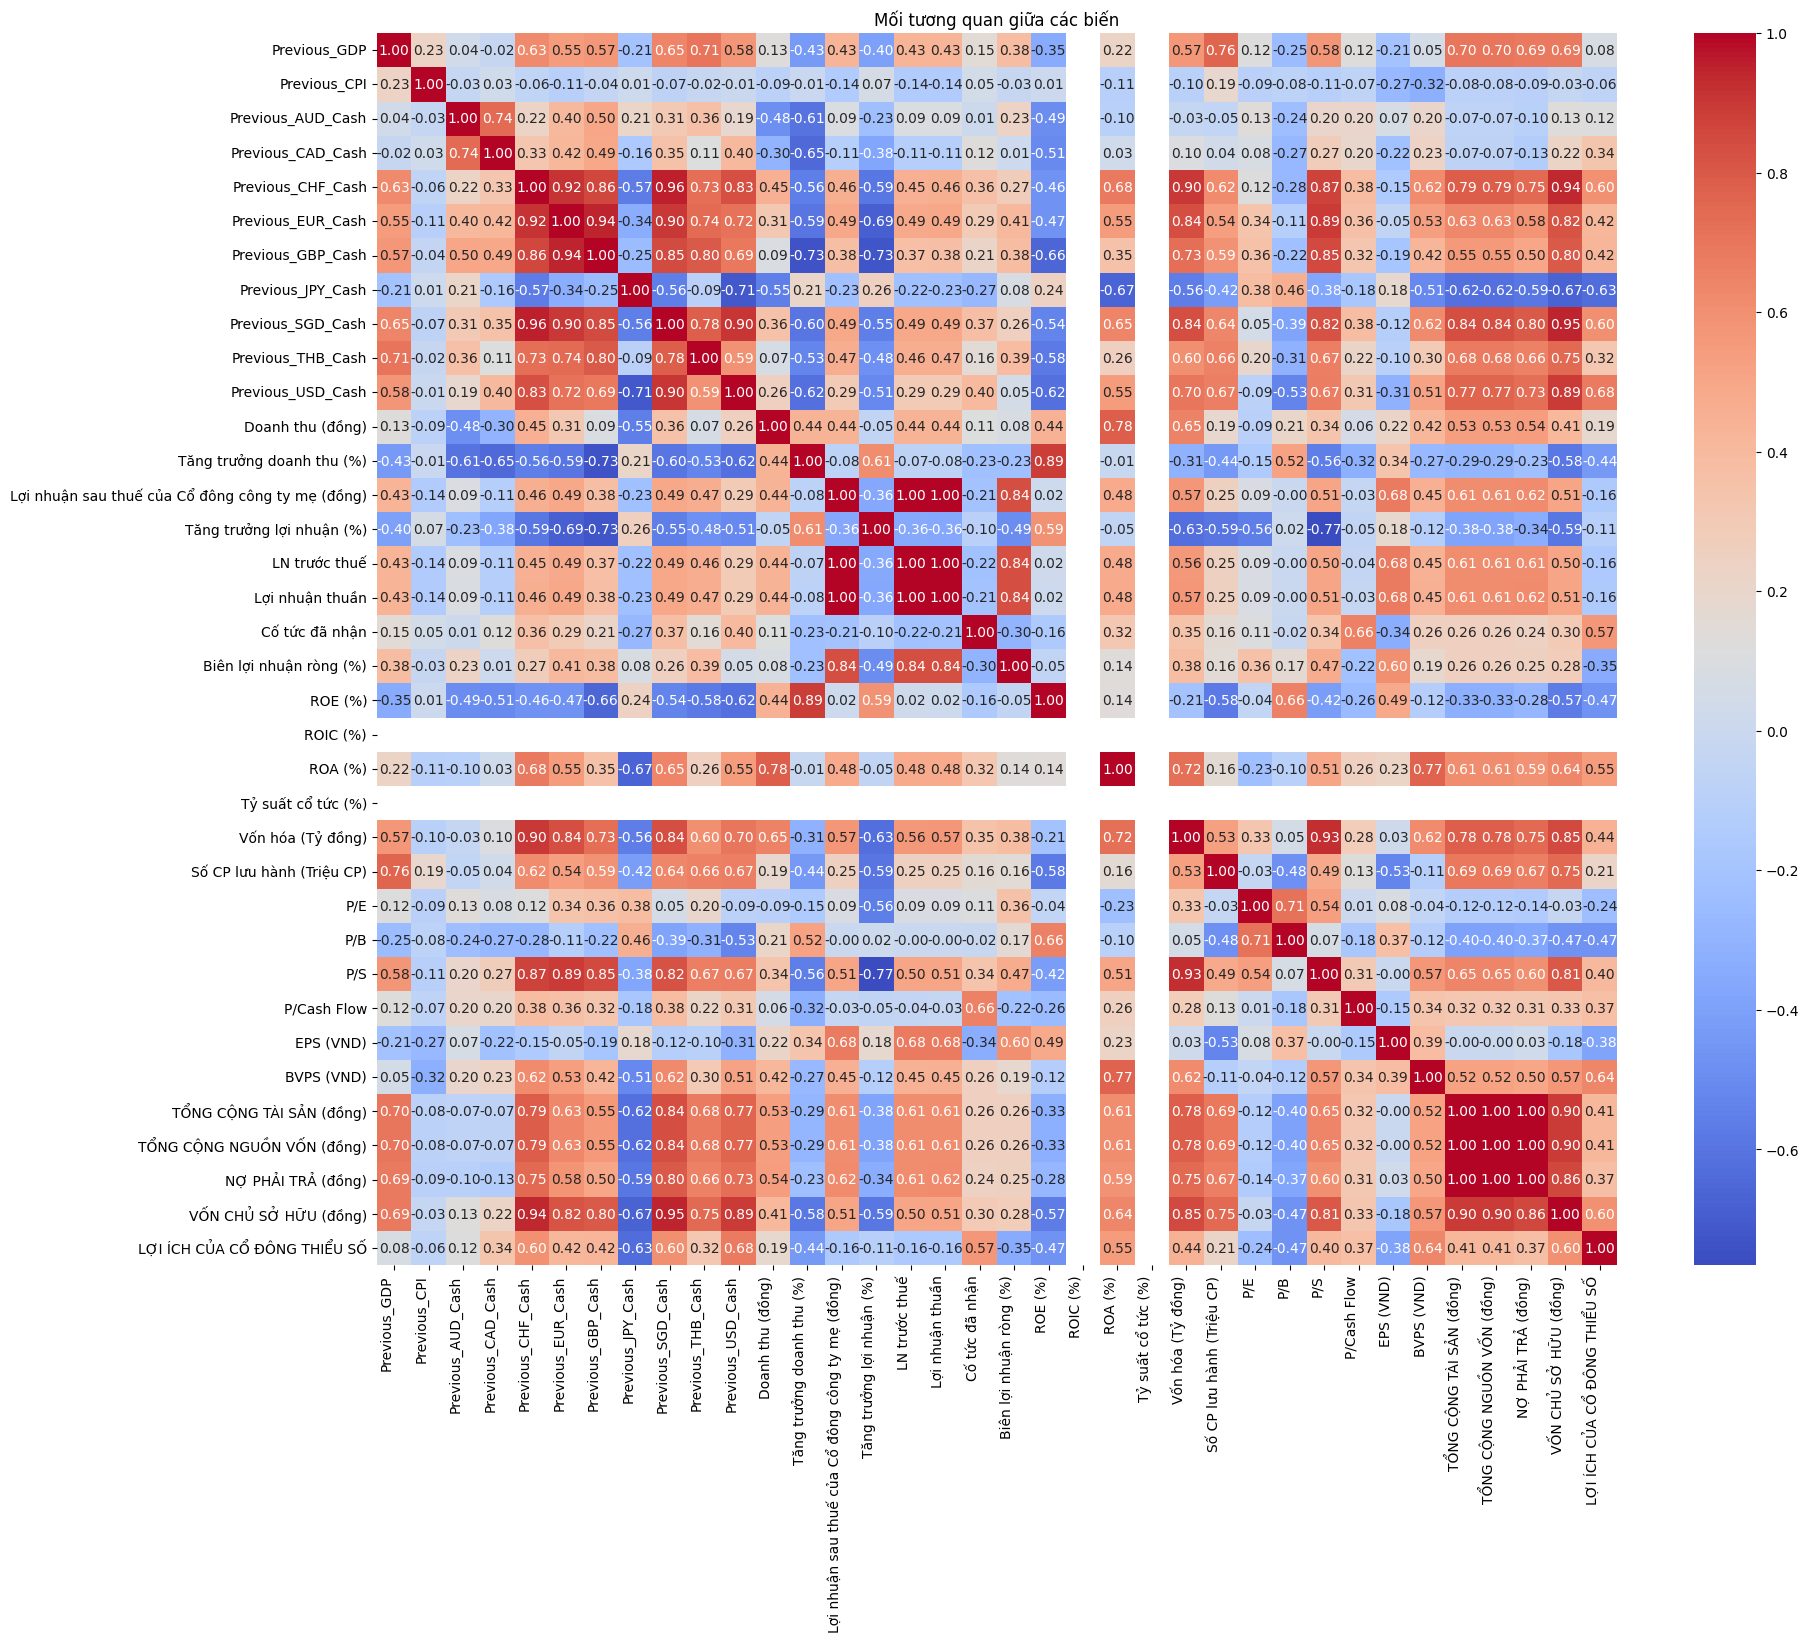

In [20]:
visualize_heatmap_corr(vcb.drop(columns=["Close", "Time"]))

In [21]:
find_pair_features_high_corr(vcb.drop(columns=["Close", "Time"]))

,Feature1,Feature2,Correlation
0,Previous_CHF_Cash,Previous_EUR_Cash,0.916107
1,Previous_CHF_Cash,Previous_SGD_Cash,0.955576
2,Previous_CHF_Cash,Vốn hóa (Tỷ đồng),0.901829
3,Previous_CHF_Cash,VỐN CHỦ SỞ HỮU (đồng),0.939676
4,Previous_EUR_Cash,Previous_GBP_Cash,0.944872
5,Previous_SGD_Cash,Previous_USD_Cash,0.904070
6,Previous_SGD_Cash,VỐN CHỦ SỞ HỮU (đồng),0.948411
7,Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),Lợi nhuận thuần,1.000000
8,LN trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),0.999966
9,LN trước thuế,Lợi nhuận thuần,0.999965


Nhận xét: Biến được giữ lại và nguyên nhân

1. Previous_EUR_Cash  
   → Đại diện cho dòng tiền ngoại tệ mạnh và ổn định nhất trong nhóm, phản ánh ảnh hưởng từ khu vực châu Âu.

2. Previous_USD_Cash  
   → USD là đồng tiền chủ đạo trong thương mại và tài chính toàn cầu, có ảnh hưởng lớn đến hoạt động doanh nghiệp.

3. Vốn hóa (Tỷ đồng)  
   → Phản ánh quy mô thị trường của doanh nghiệp, thường liên quan chặt đến giá cổ phiếu (Close).

4. VỐN CHỦ SỞ HỮU (đồng)  
   → Thể hiện giá trị sổ sách của doanh nghiệp, là nền tảng cho các chỉ số như BVPS.

5. Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)  
   → Là chỉ số lợi nhuận cốt lõi, gắn trực tiếp với hiệu quả kinh doanh và khả năng sinh lời.

6. TỔNG CỘNG TÀI SẢN (đồng)  
   → Đo lường toàn bộ quy mô tài sản doanh nghiệp, là biến trung tâm trong phân tích tài chính.


In [22]:
vcb_multicollinearity_vars = [
    "Previous_CHF_Cash",
    "Previous_SGD_Cash",
    "Previous_GBP_Cash",
    "LN trước thuế",
    "Lợi nhuận thuần",
    "P/S",
    "TỔNG CỘNG NGUỒN VỐN (đồng)",
    "NỢ PHẢI TRẢ (đồng)"
]
vcb_multicollinearity_vars

['Previous_CHF_Cash',
 'Previous_SGD_Cash',
 'Previous_GBP_Cash',
 'LN trước thuế',
 'Lợi nhuận thuần',
 'P/S',
 'TỔNG CỘNG NGUỒN VỐN (đồng)',
 'NỢ PHẢI TRẢ (đồng)']

##### BIDV

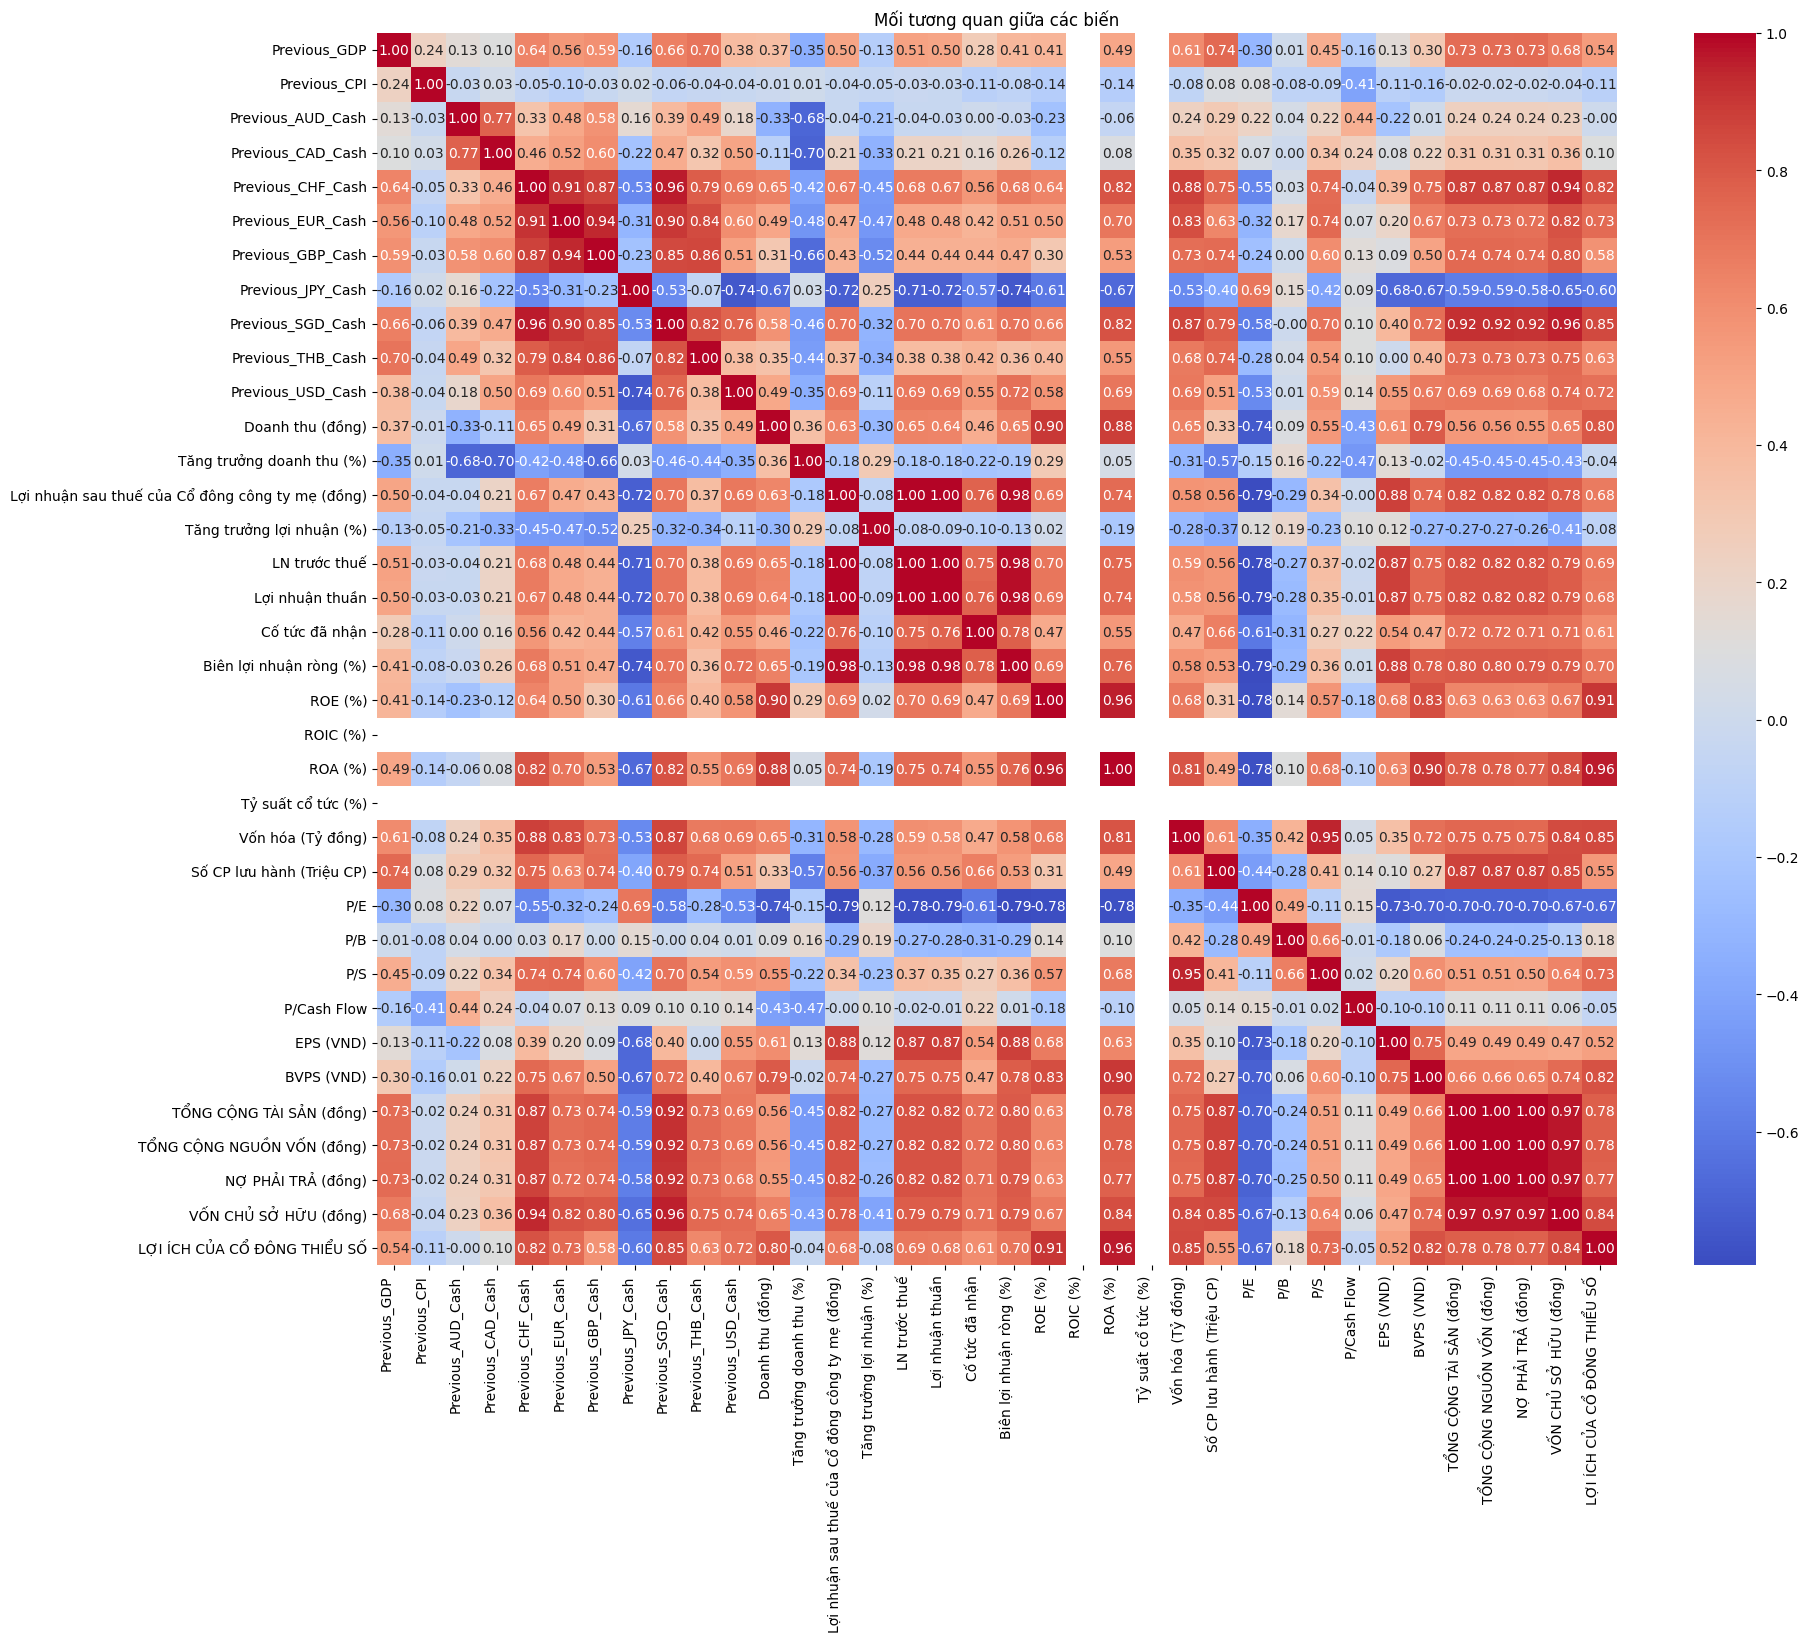

In [23]:
visualize_heatmap_corr(bid.drop(columns=["Close", "Time"]))

In [24]:
find_pair_features_high_corr(bid.drop(columns=["Close", "Time"]))

,Feature1,Feature2,Correlation
0,Previous_CHF_Cash,Previous_EUR_Cash,0.913760
1,Previous_CHF_Cash,Previous_SGD_Cash,0.961246
2,Previous_CHF_Cash,VỐN CHỦ SỞ HỮU (đồng),0.942525
3,Previous_EUR_Cash,Previous_GBP_Cash,0.941407
4,Previous_SGD_Cash,TỔNG CỘNG TÀI SẢN (đồng),0.919974
5,Previous_SGD_Cash,TỔNG CỘNG NGUỒN VỐN (đồng),0.919974
6,Previous_SGD_Cash,VỐN CHỦ SỞ HỮU (đồng),0.955590
7,Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),Lợi nhuận thuần,0.999738
8,LN trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),0.999301
9,LN trước thuế,Lợi nhuận thuần,0.999642


Nhận xét: Biến được giữ lại và lý do

1. EUR_Cash, USD_Cash  
   → Đại diện mạnh nhất trong nhóm tiền tệ, loại các biến như CHF, SGD, GBP do trùng thông tin.

2. TỔNG CỘNG TÀI SẢN (đồng)  
   → Biến cốt lõi thể hiện quy mô doanh nghiệp, liên quan chặt đến vốn, nợ và hiệu quả tài chính.

3. VỐN CHỦ SỞ HỮU (đồng)  
   → Đại diện cho giá trị tài sản ròng của doanh nghiệp, giữ lại thay vì các biến phụ như nguồn vốn hay nợ.

4. Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)  
   → Biến lợi nhuận cốt lõi, phản ánh kết quả kinh doanh cuối cùng, gắn chặt với giá cổ phiếu (Close).

5. ROE (%)  
   → ROE là chỉ số sinh lời trên vốn chủ sở hữu, được ưu tiên hơn ROA khi dự báo hiệu suất đầu tư.

6. Vốn hóa (Tỷ đồng)  
   → Phản ánh định giá thị trường của doanh nghiệp, liên quan trực tiếp đến biến mục tiêu Close.

7. BVPS (VND)  
   → Giá trị sổ sách trên mỗi cổ phiếu, thường dùng để so sánh với giá thị trường.

In [25]:
bid_multicollinearity_vars = [
    "Previous_CHF_Cash",
    "Previous_SGD_Cash",
    "Previous_GBP_Cash",
    "TỔNG CỘNG NGUỒN VỐN (đồng)",
    "NỢ PHẢI TRẢ (đồng)",
    "Lợi nhuận thuần",
    "LN trước thuế",
    "Biên lợi nhuận ròng (%)",
    "ROA (%)",
    "P/S",
    "LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ"
]
bid_multicollinearity_vars

['Previous_CHF_Cash',
 'Previous_SGD_Cash',
 'Previous_GBP_Cash',
 'TỔNG CỘNG NGUỒN VỐN (đồng)',
 'NỢ PHẢI TRẢ (đồng)',
 'Lợi nhuận thuần',
 'LN trước thuế',
 'Biên lợi nhuận ròng (%)',
 'ROA (%)',
 'P/S',
 'LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ']

##### Techcombank

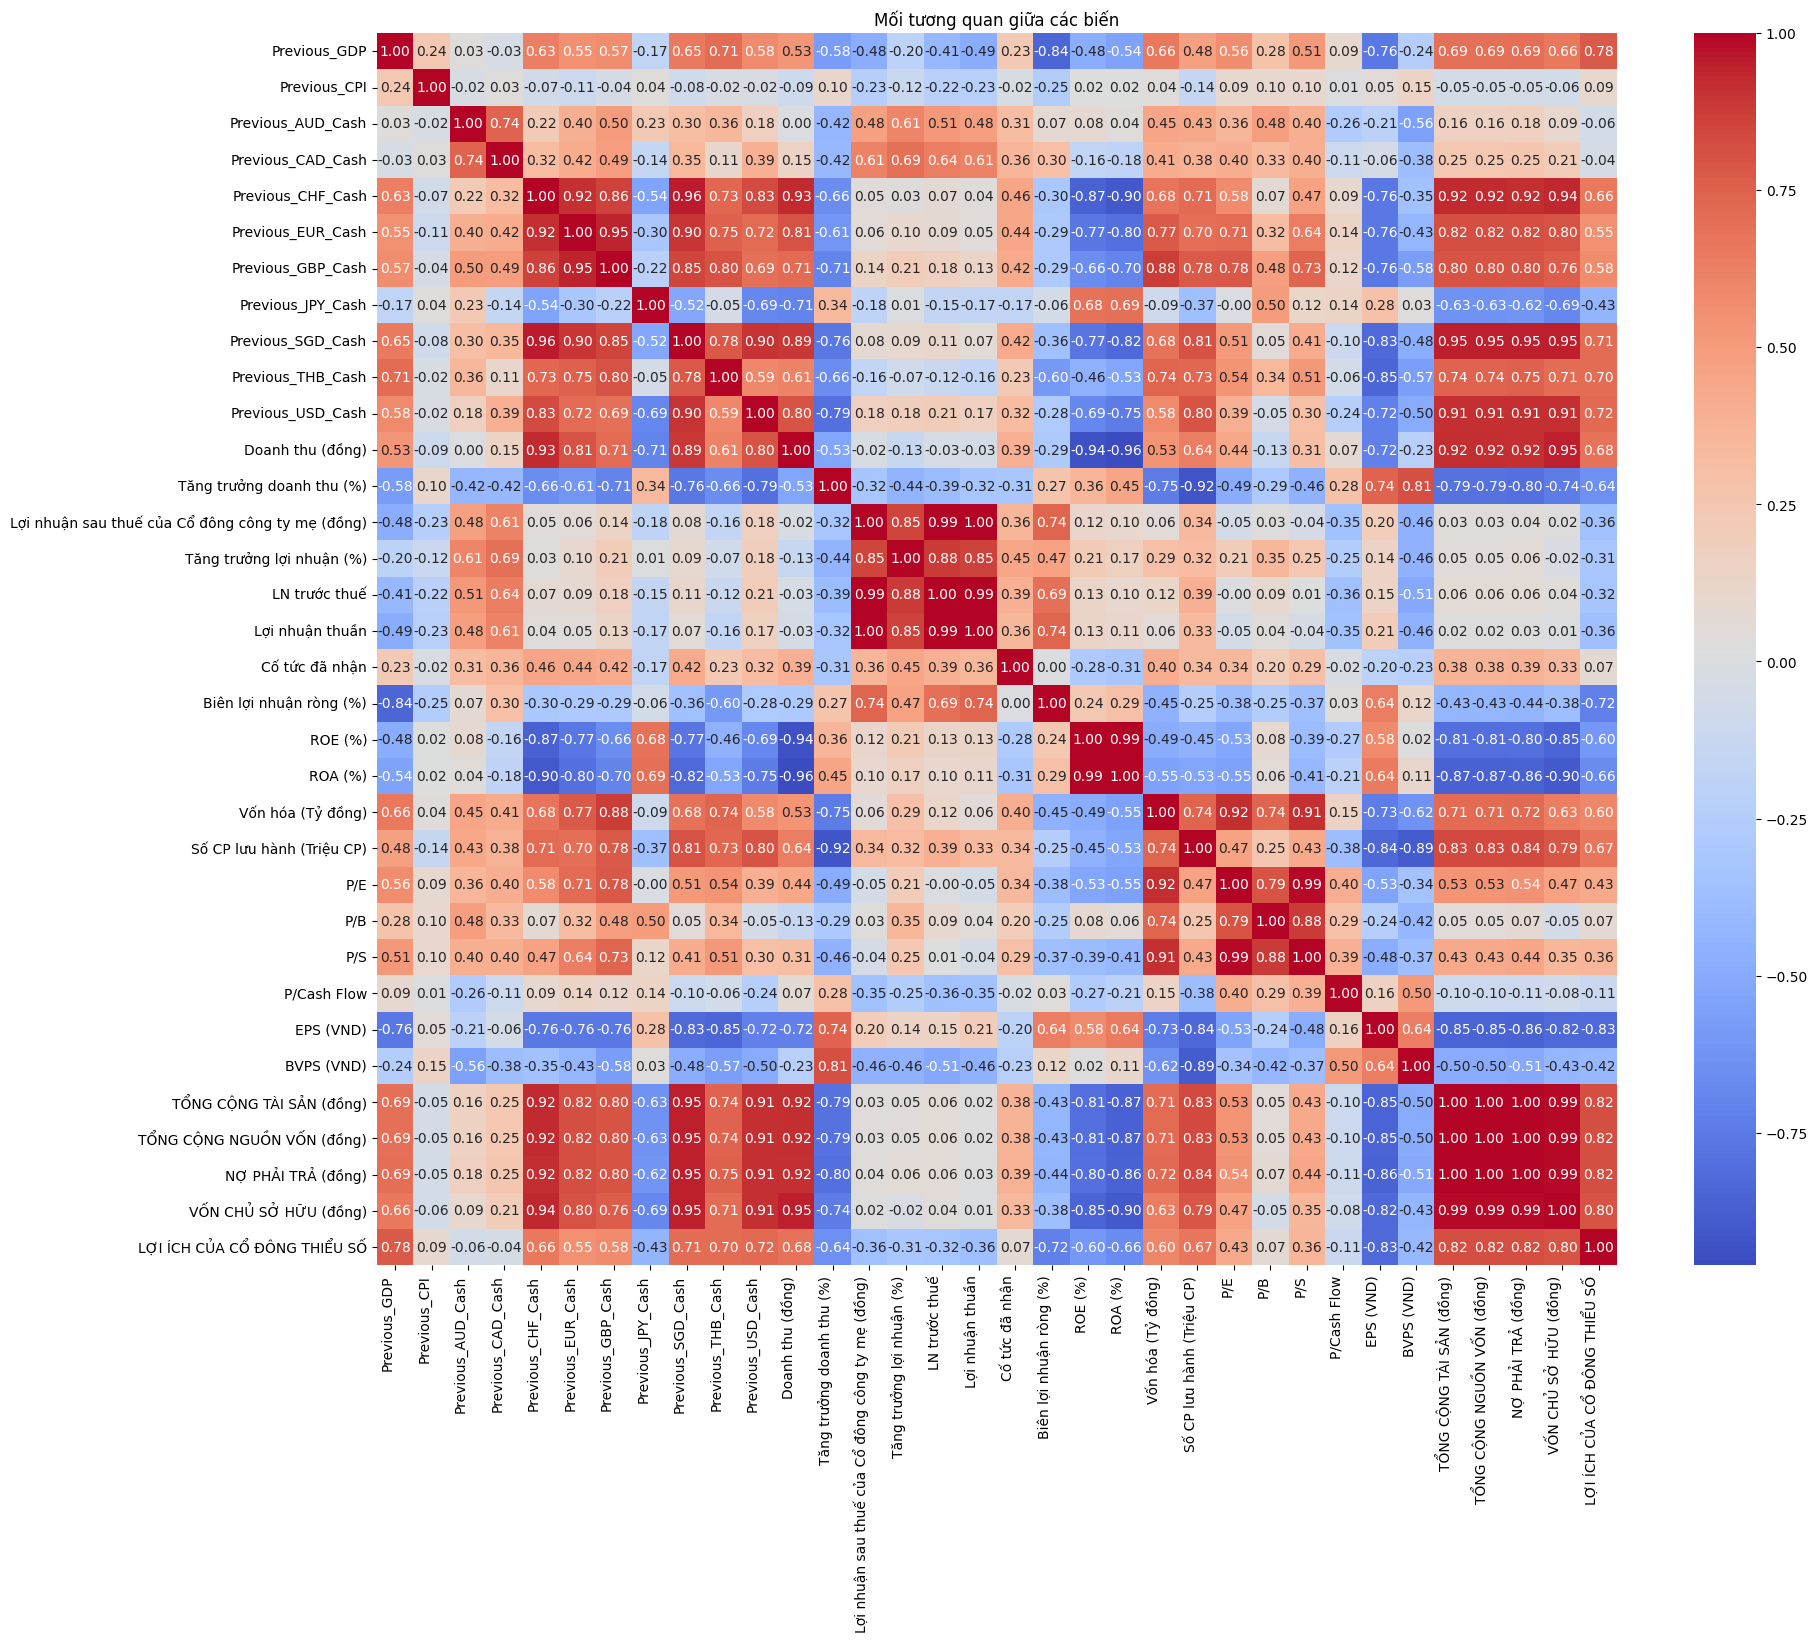

In [26]:
visualize_heatmap_corr(tcb.drop(columns=["Close", "Time"]))

In [27]:
find_pair_features_high_corr(tcb.drop(columns=["Close", "Time"]))

,Feature1,Feature2,Correlation
0,Previous_CHF_Cash,Previous_EUR_Cash,0.915569
1,Previous_CHF_Cash,Previous_SGD_Cash,0.956335
2,Previous_CHF_Cash,ROA (%),-0.902368
3,Previous_CHF_Cash,TỔNG CỘNG TÀI SẢN (đồng),0.924183
4,Previous_CHF_Cash,TỔNG CỘNG NGUỒN VỐN (đồng),0.924183
5,Previous_CHF_Cash,VỐN CHỦ SỞ HỮU (đồng),0.935166
6,Previous_EUR_Cash,Previous_GBP_Cash,0.945333
7,Previous_EUR_Cash,Previous_SGD_Cash,0.900236
8,Previous_SGD_Cash,Previous_USD_Cash,0.903714
9,Previous_SGD_Cash,TỔNG CỘNG TÀI SẢN (đồng),0.952929


Nhận xét: Biến được giữ lại và lý do

1. EUR_Cash  
   → Đại diện cho nhóm tiền tệ (CHF, SGD, USD, GBP), ổn định và phổ biến nhất, loại các biến còn lại do trùng thông tin.

2. Doanh thu (đồng)  
   → Tổng doanh thu là chỉ số đầu vào quan trọng, phản ánh quy mô hoạt động kinh doanh, có liên hệ mạnh với tài sản và vốn.

3. TỔNG CỘNG TÀI SẢN (đồng)  
   → Là biến trung tâm phản ánh quy mô doanh nghiệp, liên quan trực tiếp đến vốn, nợ, hiệu quả tài chính.

4. VỐN CHỦ SỞ HỮU (đồng)  
   → Giá trị tài sản ròng, cần thiết để tính ROE, BVPS và phản ánh tiềm lực nội tại.

5. Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)  
   → Biến lợi nhuận then chốt để đánh giá kết quả kinh doanh, liên quan trực tiếp tới giá cổ phiếu.

6. ROE (%)  
   → Thước đo khả năng sinh lời trên vốn, phổ biến hơn ROA trong đánh giá hiệu quả sử dụng vốn.

7. Vốn hóa (Tỷ đồng)  
   → Phản ánh định giá thị trường, là biến sát nhất với biến mục tiêu Close.

8. P/E  
   → Được ưu tiên hơn P/S vì phản ánh kỳ vọng nhà đầu tư về lợi nhuận, liên hệ gần với giá cổ phiếu.



In [28]:
tcb_multicollinearity_vars = [
    "Previous_CHF_Cash",
    "Previous_SGD_Cash",
    "ROA (%)",
    "TỔNG CỘNG NGUỒN VỐN (đồng)",
    "Previous_GBP_Cash",
    "NỢ PHẢI TRẢ (đồng)",
    "Lợi nhuận thuần",
    "Số CP lưu hành (Triệu CP)",
    "P/S",
    "TỔNG CỘNG TÀI SẢN (đồng)",
    "Tăng trưởng doanh thu (%)"
]
tcb_multicollinearity_vars

['Previous_CHF_Cash',
 'Previous_SGD_Cash',
 'ROA (%)',
 'TỔNG CỘNG NGUỒN VỐN (đồng)',
 'Previous_GBP_Cash',
 'NỢ PHẢI TRẢ (đồng)',
 'Lợi nhuận thuần',
 'Số CP lưu hành (Triệu CP)',
 'P/S',
 'TỔNG CỘNG TÀI SẢN (đồng)',
 'Tăng trưởng doanh thu (%)']

In [29]:
multicollinearity_vars = vcb_multicollinearity_vars + bid_multicollinearity_vars + tcb_multicollinearity_vars
multicollinearity_vars = list(set(multicollinearity_vars))
multicollinearity_vars

['TỔNG CỘNG TÀI SẢN (đồng)',
 'Previous_SGD_Cash',
 'ROA (%)',
 'NỢ PHẢI TRẢ (đồng)',
 'Số CP lưu hành (Triệu CP)',
 'Previous_GBP_Cash',
 'Previous_CHF_Cash',
 'P/S',
 'LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ',
 'TỔNG CỘNG NGUỒN VỐN (đồng)',
 'Tăng trưởng doanh thu (%)',
 'Biên lợi nhuận ròng (%)',
 'LN trước thuế',
 'Lợi nhuận thuần']

#### Target

In [30]:
def visualize_heatmap_corr_target(dataframe: pd.DataFrame):
    plt.figure(figsize=(9, 16)) 
    sns.heatmap(pd.DataFrame(dataframe.corr()["Close"]), annot=True, cmap="coolwarm", fmt=".2f")
    plt.xticks(ha="right")
    plt.title("Mối tương quan giữa các biến với biến mục tiêu")
    plt.show()

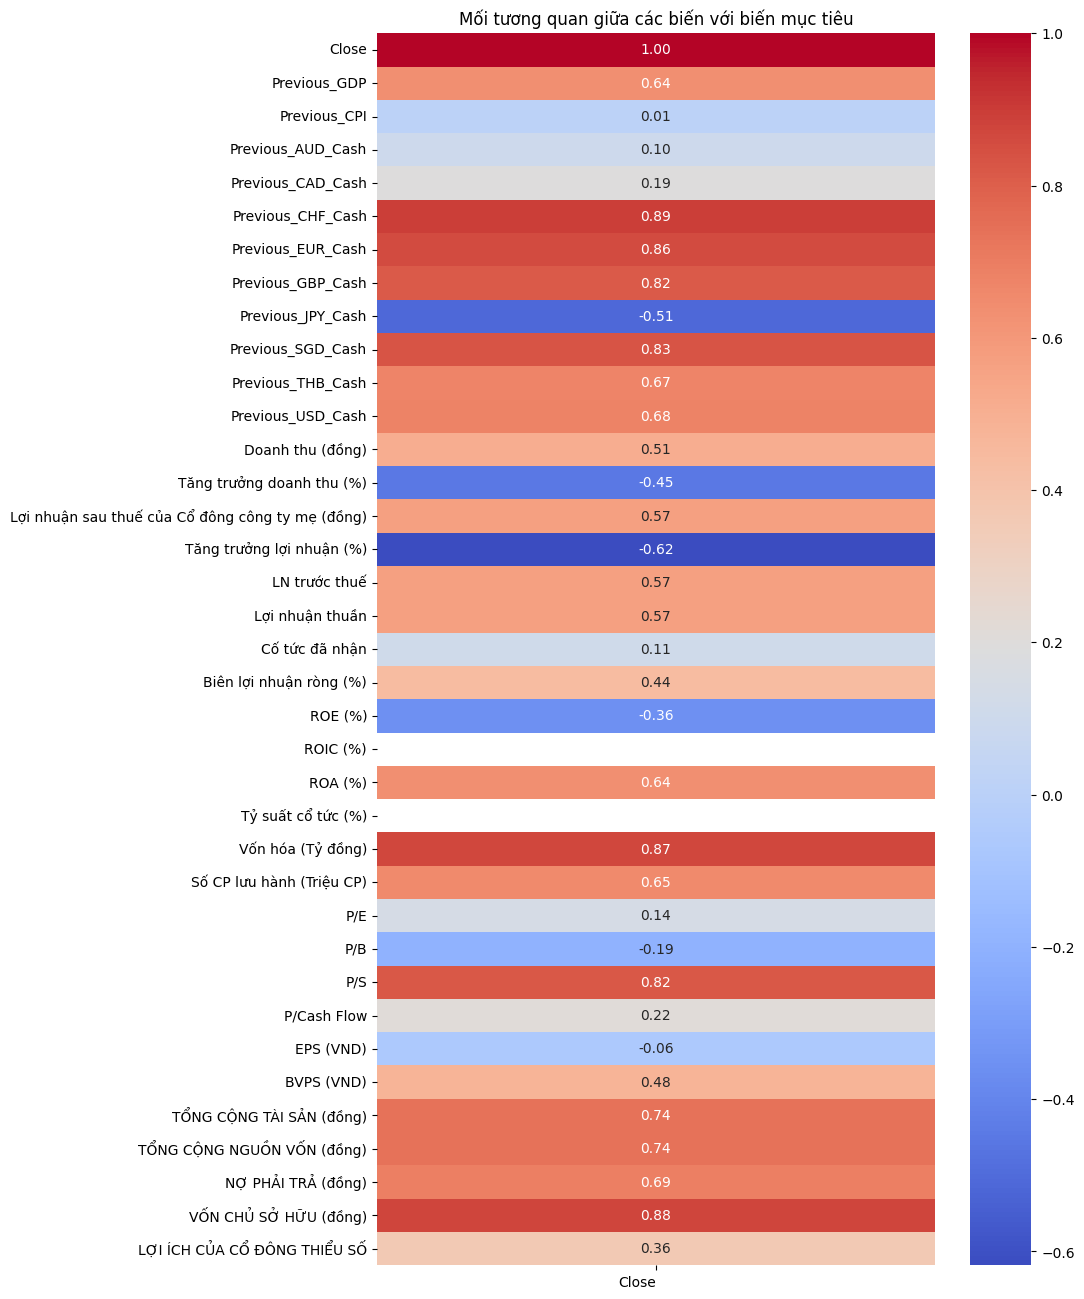

In [31]:
visualize_heatmap_corr_target(vcb.drop(columns=["Time"]))

Nhận xét: Các biến có tương quan thấp hơn 0.3 với Close
  - Previous_CPI
  - AUD_Cash
  - CAD_Cash
  - Cổ tức đã nhận
  - Tỷ suất cổ tức (%)
  - P/E
  - P/B
  - P/Cash Flow
  - EPS (VND)
  - ROIC (%)

In [32]:
vcb_low_correlation_vars = [
    "Previous_CPI",
    "Previous_AUD_Cash",
    "Previous_CAD_Cash",
    "Cố tức đã nhận",
    "Tỷ suất cổ tức (%)",
    "P/E",
    "P/B",
    "P/Cash Flow",
    "EPS (VND)",
    "ROIC (%)"
]
vcb_low_correlation_vars

['Previous_CPI',
 'Previous_AUD_Cash',
 'Previous_CAD_Cash',
 'Cố tức đã nhận',
 'Tỷ suất cổ tức (%)',
 'P/E',
 'P/B',
 'P/Cash Flow',
 'EPS (VND)',
 'ROIC (%)']

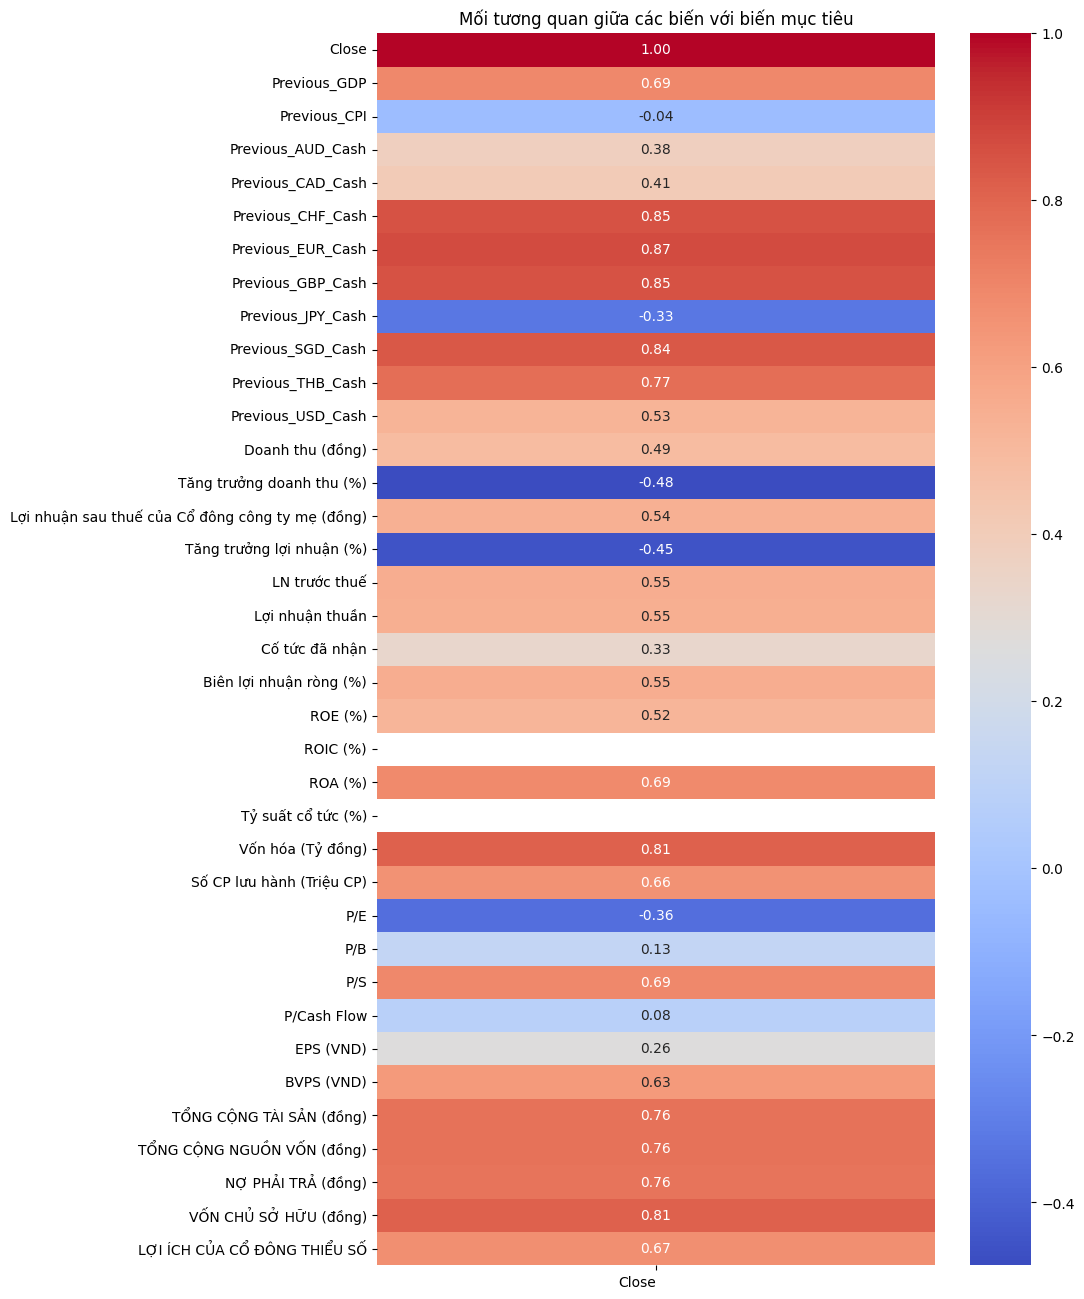

In [33]:
visualize_heatmap_corr_target(bid.drop(columns=["Time"]))

In [34]:
bid_low_correlation_vars = [
    "Previous_CPI",
    "ROIC (%)",
    "Tỷ suất cổ tức (%)",
    "P/B",
    "P/Cash Flow",
    "EPS (VND)"
]
bid_low_correlation_vars

['Previous_CPI',
 'ROIC (%)',
 'Tỷ suất cổ tức (%)',
 'P/B',
 'P/Cash Flow',
 'EPS (VND)']

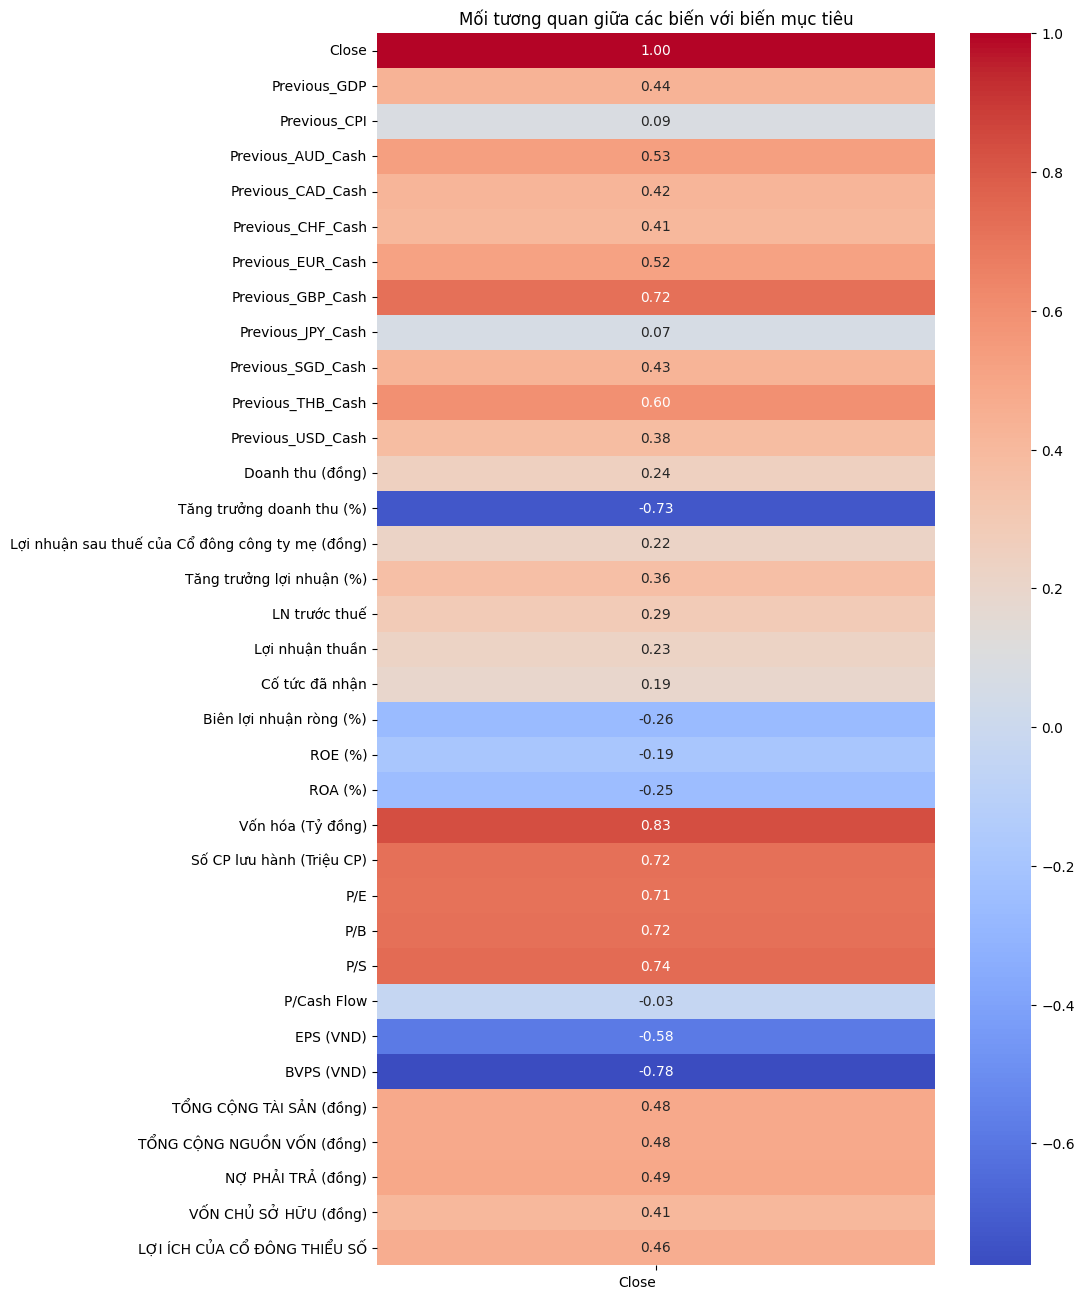

In [35]:
visualize_heatmap_corr_target(tcb.drop(columns=["Time"]))

In [36]:
tcb_low_correlation_vars = [
    "Previous_CPI",
    "Previous_JPY_Cash",
    "Doanh thu (đồng)",
    "Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)",
    "LN trước thuế",
    "Lợi nhuận thuần",
    "Cố tức đã nhận",
    "Biên lợi nhuận ròng (%)",
    "ROE (%)",
    "ROA (%)",
    "P/Cash Flow",
]
tcb_low_correlation_vars

['Previous_CPI',
 'Previous_JPY_Cash',
 'Doanh thu (đồng)',
 'Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)',
 'LN trước thuế',
 'Lợi nhuận thuần',
 'Cố tức đã nhận',
 'Biên lợi nhuận ròng (%)',
 'ROE (%)',
 'ROA (%)',
 'P/Cash Flow']

In [37]:
low_correlation_vars = vcb_low_correlation_vars + bid_low_correlation_vars + tcb_low_correlation_vars
low_correlation_vars = list(set(low_correlation_vars))
low_correlation_vars

['ROIC (%)',
 'Previous_AUD_Cash',
 'P/Cash Flow',
 'Lợi nhuận thuần',
 'Cố tức đã nhận',
 'P/E',
 'Doanh thu (đồng)',
 'Previous_JPY_Cash',
 'ROA (%)',
 'P/B',
 'Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)',
 'ROE (%)',
 'Tỷ suất cổ tức (%)',
 'EPS (VND)',
 'Biên lợi nhuận ròng (%)',
 'Previous_CPI',
 'LN trước thuế',
 'Previous_CAD_Cash']

## Random Forest

In [38]:
def plot_feature_importance(dataframe, bank, target_column="Close", time_column="Time", color="blue"):
    X = dataframe.drop(columns=[target_column, time_column])
    y = dataframe[target_column]

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    feature_importances = rf.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Importance": feature_importances
    })

    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False).reset_index().drop(columns=["index"])

    plt.figure(figsize=(14, 9))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df, color=color)
    plt.title(f"Feature Importance from Random Forest ({bank})")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

    print(f"Feature Importance for {bank}:")
    print(feature_importance_df[feature_importance_df["Importance"] == 0])
    print("\n")

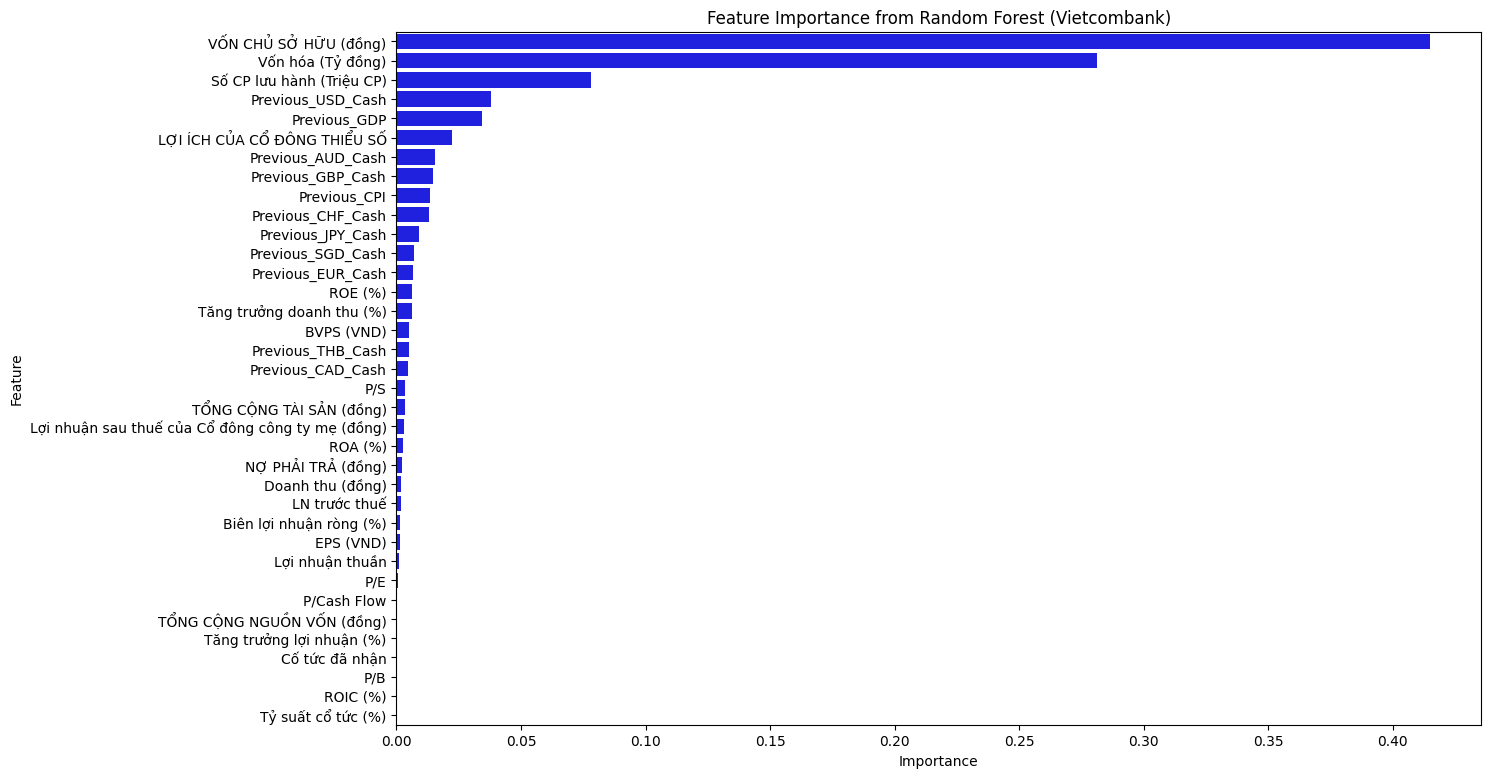

Feature Importance for Vietcombank:
               Feature  Importance
34            ROIC (%)         0.0
35  Tỷ suất cổ tức (%)         0.0




In [39]:
plot_feature_importance(vcb, "Vietcombank")

Nhận xét: Biến không quan trọng:
  - ROIC (%)
  - Tỷ suất cổ tức (%)

In [40]:
vcb_low_importance_vars = [
    "ROIC (%)",
    "Tỷ suất cổ tức (%)"
]
vcb_low_importance_vars

['ROIC (%)', 'Tỷ suất cổ tức (%)']

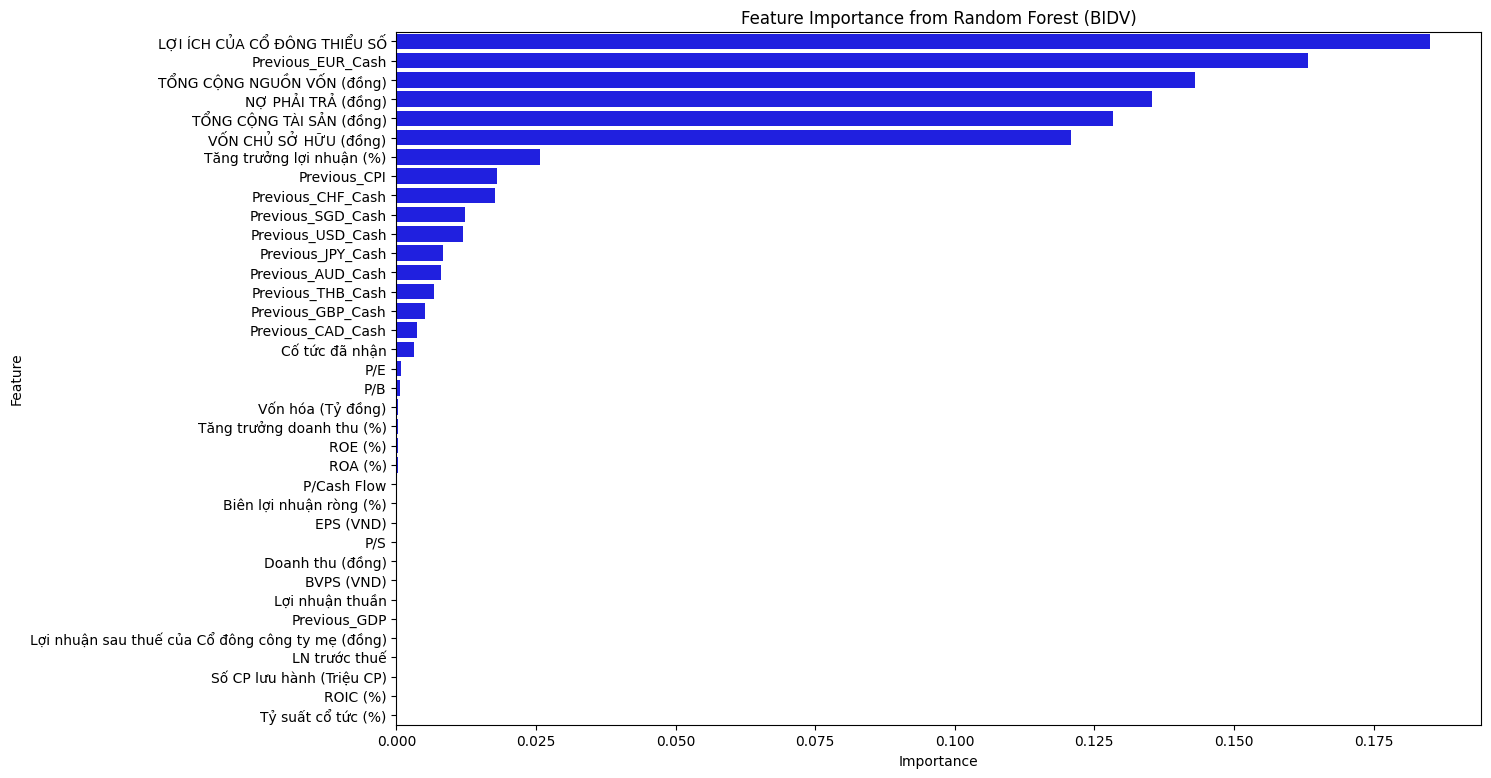

Feature Importance for BIDV:
               Feature  Importance
34            ROIC (%)         0.0
35  Tỷ suất cổ tức (%)         0.0




In [41]:
plot_feature_importance(bid, "BIDV")

Nhận xét: Biến không quan trọng:
  - ROIC (%)
  - Tỷ suất cổ tức (%)

In [42]:
bid_low_importance_vars = [
    "ROIC (%)",
    "Tỷ suất cổ tức (%)"
]
bid_low_importance_vars

['ROIC (%)', 'Tỷ suất cổ tức (%)']

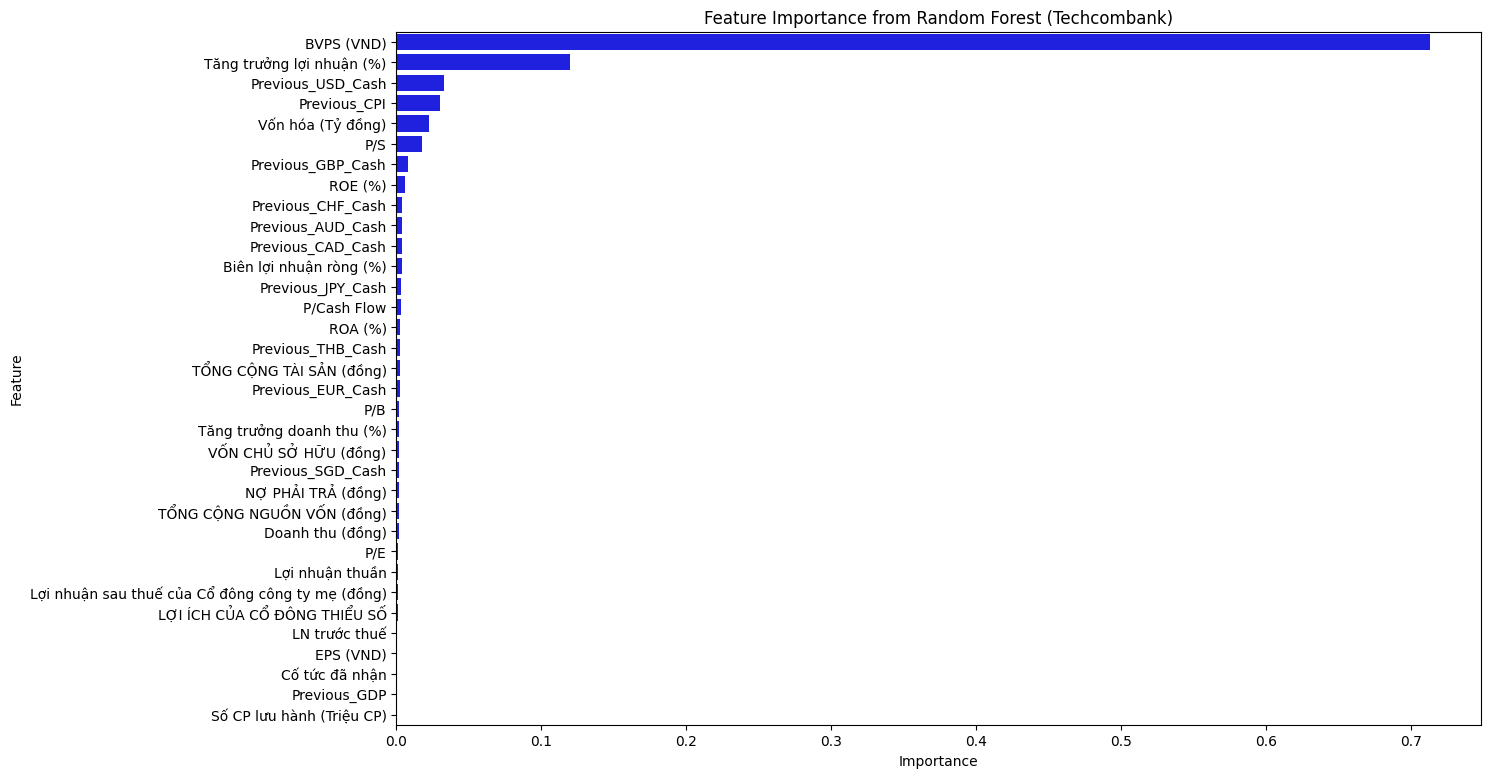

Feature Importance for Techcombank:
Empty DataFrame
Columns: [Feature, Importance]
Index: []




In [43]:
plot_feature_importance(tcb, "Techcombank")

In [44]:
low_importance_vars = vcb_low_importance_vars + bid_low_importance_vars
low_importance_vars = list(set(low_importance_vars))
low_importance_vars

['ROIC (%)', 'Tỷ suất cổ tức (%)']

## Drop columns

In [45]:
columns_to_drop = multicollinearity_vars + low_correlation_vars + low_importance_vars
columns_to_drop = list(set(columns_to_drop))
columns_to_drop

['TỔNG CỘNG TÀI SẢN (đồng)',
 'Cố tức đã nhận',
 'ROE (%)',
 'Previous_GBP_Cash',
 'Tỷ suất cổ tức (%)',
 'TỔNG CỘNG NGUỒN VỐN (đồng)',
 'Tăng trưởng doanh thu (%)',
 'Previous_CPI',
 'LN trước thuế',
 'Previous_CAD_Cash',
 'ROIC (%)',
 'P/Cash Flow',
 'Previous_SGD_Cash',
 'P/B',
 'Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)',
 'Previous_CHF_Cash',
 'Previous_AUD_Cash',
 'P/E',
 'Previous_JPY_Cash',
 'P/S',
 'Biên lợi nhuận ròng (%)',
 'Doanh thu (đồng)',
 'ROA (%)',
 'LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ',
 'EPS (VND)',
 'Số CP lưu hành (Triệu CP)',
 'NỢ PHẢI TRẢ (đồng)',
 'Lợi nhuận thuần']

In [46]:
vcb.drop(columns=columns_to_drop, inplace=True)
vcb

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
0,2022-01-04,44.74,1467490,25137.39,603.35,22610.0,0.153907,382860590593900,23038.541622,111170655000000
1,2022-01-05,44.18,1467490,25088.57,605.71,22610.0,0.153907,382860590593900,23038.541622,111170655000000
2,2022-01-06,44.80,1467490,25011.08,604.82,22590.0,0.153907,382860590593900,23038.541622,111170655000000
3,2022-01-07,45.20,1467490,25077.61,604.82,22590.0,0.153907,382860590593900,23038.541622,111170655000000
4,2022-01-10,45.03,1467490,25013.62,595.78,22540.0,0.153907,382860590593900,23038.541622,111170655000000
...,...,...,...,...,...,...,...,...,...,...
801,2025-03-25,66.20,1773652,27083.86,667.17,25420.0,-0.084409,501340505640000,23470.623833,196209168000000
802,2025-03-26,65.80,1773652,26954.00,665.01,25420.0,-0.084409,501340505640000,23470.623833,196209168000000
803,2025-03-27,65.50,1773652,26895.83,663.65,25360.0,-0.084409,501340505640000,23470.623833,196209168000000
804,2025-03-28,64.80,1773652,26838.53,664.82,25360.0,-0.084409,501340505640000,23470.623833,196209168000000


In [47]:
bid.drop(columns=columns_to_drop, inplace=True)
bid

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
0,2022-01-04,27.43,1467490,25359.0,651.07,22635.0,0.355021,188430012146000,16434.655845,86366645000000
1,2022-01-05,27.17,1467490,25216.0,646.13,22585.0,0.355021,188430012146000,16434.655845,86366645000000
2,2022-01-06,27.87,1467490,25207.0,648.19,22555.0,0.355021,188430012146000,16434.655845,86366645000000
3,2022-01-07,28.75,1467490,25223.0,642.48,22565.0,0.355021,188430012146000,16434.655845,86366645000000
4,2022-01-11,28.89,1467490,25209.0,636.69,22495.0,0.355021,188430012146000,16434.655845,86366645000000
...,...,...,...,...,...,...,...,...,...,...
746,2025-03-25,39.70,1773652,27347.0,695.20,24442.0,0.285767,256279709970500,20577.535482,144911113000000
747,2025-03-26,39.55,1773652,27221.0,693.29,24432.0,0.285767,256279709970500,20577.535482,144911113000000
748,2025-03-27,39.10,1773652,27173.0,692.67,24389.0,0.285767,256279709970500,20577.535482,144911113000000
749,2025-03-28,39.10,1773652,27107.0,693.35,24384.0,0.285767,256279709970500,20577.535482,144911113000000


Nhận xét: Techcombank không có biến ROIC (%) và Tỷ suất cổ tức (%).

In [48]:
tcb.drop(columns=list(set(columns_to_drop) - set(["ROIC (%)", "Tỷ suất cổ tức (%)"])), inplace=True)
tcb

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
0,2022-01-05,24.49,1467490,25087.0,599.0,22579.0,0.161678,160097714788800,26259.416507,93055837000000
1,2022-01-07,23.98,1467490,25070.0,595.0,22564.0,0.161678,160097714788800,26259.416507,93055837000000
2,2022-01-11,23.49,1467490,25113.0,591.0,22515.0,0.161678,160097714788800,26259.416507,93055837000000
3,2022-01-12,24.44,1467490,25162.0,597.0,22530.0,0.161678,160097714788800,26259.416507,93055837000000
4,2022-01-13,24.49,1467490,25188.0,596.0,22521.0,0.161678,160097714788800,26259.416507,93055837000000
...,...,...,...,...,...,...,...,...,...,...
632,2025-03-21,27.35,1773652,27080.0,673.0,25335.0,-0.240565,183686145214000,20583.468751,147939621000000
633,2025-03-25,27.90,1773652,27165.0,673.0,25414.0,-0.240565,183686145214000,20583.468751,147939621000000
634,2025-03-26,28.00,1773652,27053.0,670.0,25399.0,-0.240565,183686145214000,20583.468751,147939621000000
635,2025-03-27,27.75,1773652,26997.0,668.0,25350.0,-0.240565,183686145214000,20583.468751,147939621000000


# Split train, validation, test dataset

## Vietcombank

In [49]:
vcb_train = vcb[convert_str_to_datetime(vcb["Time"]).dt.year < 2025]
vcb_train

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
0,2022-01-04,44.74,1467490,25137.39,603.35,22610.0,0.153907,382860590593900,23038.541622,111170655000000
1,2022-01-05,44.18,1467490,25088.57,605.71,22610.0,0.153907,382860590593900,23038.541622,111170655000000
2,2022-01-06,44.80,1467490,25011.08,604.82,22590.0,0.153907,382860590593900,23038.541622,111170655000000
3,2022-01-07,45.20,1467490,25077.61,604.82,22590.0,0.153907,382860590593900,23038.541622,111170655000000
4,2022-01-10,45.03,1467490,25013.62,595.78,22540.0,0.153907,382860590593900,23038.541622,111170655000000
...,...,...,...,...,...,...,...,...,...,...
743,2024-12-25,61.81,1561963,25792.47,657.38,25193.0,0.178524,512519668725400,34028.114605,190297001000000
744,2024-12-26,61.61,1561963,25779.62,658.40,25206.0,0.178524,512519668725400,34028.114605,190297001000000
745,2024-12-27,61.67,1561963,25747.18,657.18,25195.0,0.178524,512519668725400,34028.114605,190297001000000
746,2024-12-30,61.54,1561963,25817.03,658.27,25208.0,0.178524,512519668725400,34028.114605,190297001000000


In [50]:
vcb_validation = vcb[
    (convert_str_to_datetime(vcb["Time"]).dt.year == 2024) &
    (convert_str_to_datetime(vcb["Time"]).dt.month.isin([9, 10, 11, 12]))
]
vcb_validation

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
663,2024-09-04,60.87,1508387,26832.82,648.89,24660.0,0.093844,510842941346800,32491.336872,181702785000000
664,2024-09-05,60.27,1508387,26747.53,641.36,24645.0,0.093844,510842941346800,32491.336872,181702785000000
665,2024-09-06,60.33,1508387,26760.93,650.12,24550.0,0.093844,510842941346800,32491.336872,181702785000000
666,2024-09-09,60.33,1508387,26648.94,648.49,24400.0,0.093844,510842941346800,32491.336872,181702785000000
667,2024-09-10,59.53,1508387,26570.99,642.47,24470.0,0.093844,510842941346800,32491.336872,181702785000000
...,...,...,...,...,...,...,...,...,...,...
743,2024-12-25,61.81,1561963,25792.47,657.38,25193.0,0.178524,512519668725400,34028.114605,190297001000000
744,2024-12-26,61.61,1561963,25779.62,658.40,25206.0,0.178524,512519668725400,34028.114605,190297001000000
745,2024-12-27,61.67,1561963,25747.18,657.18,25195.0,0.178524,512519668725400,34028.114605,190297001000000
746,2024-12-30,61.54,1561963,25817.03,658.27,25208.0,0.178524,512519668725400,34028.114605,190297001000000


In [51]:
vcb_test = vcb[
    (
        (convert_str_to_datetime(vcb["Time"]).dt.year == 2024) &
        (convert_str_to_datetime(vcb["Time"]).dt.month == 12)
    ) | 
    (convert_str_to_datetime(vcb["Time"]).dt.year == 2025)
]
vcb_test

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
726,2024-12-02,63.01,1561963,26096.55,651.81,25130.0,0.178524,512519668725400,34028.114605,190297001000000
727,2024-12-03,62.21,1561963,26024.50,650.42,25119.0,0.178524,512519668725400,34028.114605,190297001000000
728,2024-12-04,62.54,1561963,25951.79,650.12,25140.0,0.178524,512519668725400,34028.114605,190297001000000
729,2024-12-05,62.88,1561963,25981.82,653.22,25142.0,0.178524,512519668725400,34028.114605,190297001000000
730,2024-12-06,63.01,1561963,26016.47,655.51,25146.0,0.178524,512519668725400,34028.114605,190297001000000
...,...,...,...,...,...,...,...,...,...,...
801,2025-03-25,66.20,1773652,27083.86,667.17,25420.0,-0.084409,501340505640000,23470.623833,196209168000000
802,2025-03-26,65.80,1773652,26954.00,665.01,25420.0,-0.084409,501340505640000,23470.623833,196209168000000
803,2025-03-27,65.50,1773652,26895.83,663.65,25360.0,-0.084409,501340505640000,23470.623833,196209168000000
804,2025-03-28,64.80,1773652,26838.53,664.82,25360.0,-0.084409,501340505640000,23470.623833,196209168000000


## BIDV

In [52]:
bid_train = bid[convert_str_to_datetime(bid["Time"]).dt.year < 2025]
bid_train

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
0,2022-01-04,27.43,1467490,25359.0,651.07,22635.0,0.355021,188430012146000,16434.655845,86366645000000
1,2022-01-05,27.17,1467490,25216.0,646.13,22585.0,0.355021,188430012146000,16434.655845,86366645000000
2,2022-01-06,27.87,1467490,25207.0,648.19,22555.0,0.355021,188430012146000,16434.655845,86366645000000
3,2022-01-07,28.75,1467490,25223.0,642.48,22565.0,0.355021,188430012146000,16434.655845,86366645000000
4,2022-01-11,28.89,1467490,25209.0,636.69,22495.0,0.355021,188430012146000,16434.655845,86366645000000
...,...,...,...,...,...,...,...,...,...,...
692,2024-12-25,38.65,1561963,25981.0,684.02,24219.0,0.124035,269003095452000,19333.031073,138439656000000
693,2024-12-26,39.00,1561963,26014.0,683.64,24227.0,0.124035,269003095452000,19333.031073,138439656000000
694,2024-12-27,39.15,1561963,25983.0,682.94,24216.0,0.124035,269003095452000,19333.031073,138439656000000
695,2024-12-30,38.25,1561963,26018.0,683.55,24209.0,0.124035,269003095452000,19333.031073,138439656000000


In [53]:
bid_validation = bid[
    (convert_str_to_datetime(bid["Time"]).dt.year == 2024) &
    (convert_str_to_datetime(bid["Time"]).dt.month.isin([9, 10, 11, 12]))
]
bid_validation

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
617,2024-09-04,40.45,1508387,27109.0,674.62,23704.0,0.173203,281601533460000,22747.219208,134717273000000
618,2024-09-05,40.25,1508387,27012.0,667.68,23702.0,0.173203,281601533460000,22747.219208,134717273000000
619,2024-09-06,40.74,1508387,26953.0,671.70,23602.0,0.173203,281601533460000,22747.219208,134717273000000
620,2024-09-10,40.08,1508387,26801.0,668.60,23534.0,0.173203,281601533460000,22747.219208,134717273000000
621,2024-09-11,39.92,1508387,26777.0,670.56,23520.0,0.173203,281601533460000,22747.219208,134717273000000
...,...,...,...,...,...,...,...,...,...,...
692,2024-12-25,38.65,1561963,25981.0,684.02,24219.0,0.124035,269003095452000,19333.031073,138439656000000
693,2024-12-26,39.00,1561963,26014.0,683.64,24227.0,0.124035,269003095452000,19333.031073,138439656000000
694,2024-12-27,39.15,1561963,25983.0,682.94,24216.0,0.124035,269003095452000,19333.031073,138439656000000
695,2024-12-30,38.25,1561963,26018.0,683.55,24209.0,0.124035,269003095452000,19333.031073,138439656000000


In [54]:
bid_test = bid[
    (
        (convert_str_to_datetime(bid["Time"]).dt.year == 2024) &
        (convert_str_to_datetime(bid["Time"]).dt.month == 12)
    ) | 
    (convert_str_to_datetime(bid["Time"]).dt.year == 2025)
]
bid_test

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
676,2024-12-02,38.43,1561963,26357.0,680.59,24154.0,0.124035,269003095452000,19333.031073,138439656000000
677,2024-12-03,38.06,1561963,26239.0,675.78,24144.0,0.124035,269003095452000,19333.031073,138439656000000
678,2024-12-04,37.31,1561963,26171.0,678.56,24166.0,0.124035,269003095452000,19333.031073,138439656000000
679,2024-12-05,38.01,1561963,26186.0,679.67,24178.0,0.124035,269003095452000,19333.031073,138439656000000
680,2024-12-06,38.51,1561963,26255.0,682.44,24170.0,0.124035,269003095452000,19333.031073,138439656000000
...,...,...,...,...,...,...,...,...,...,...
746,2025-03-25,39.70,1773652,27347.0,695.20,24442.0,0.285767,256279709970500,20577.535482,144911113000000
747,2025-03-26,39.55,1773652,27221.0,693.29,24432.0,0.285767,256279709970500,20577.535482,144911113000000
748,2025-03-27,39.10,1773652,27173.0,692.67,24389.0,0.285767,256279709970500,20577.535482,144911113000000
749,2025-03-28,39.10,1773652,27107.0,693.35,24384.0,0.285767,256279709970500,20577.535482,144911113000000


## Techcombank

In [55]:
tcb_train = tcb[convert_str_to_datetime(tcb["Time"]).dt.year < 2025]
tcb_train

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
0,2022-01-05,24.49,1467490,25087.0,599.0,22579.0,0.161678,160097714788800,26259.416507,93055837000000
1,2022-01-07,23.98,1467490,25070.0,595.0,22564.0,0.161678,160097714788800,26259.416507,93055837000000
2,2022-01-11,23.49,1467490,25113.0,591.0,22515.0,0.161678,160097714788800,26259.416507,93055837000000
3,2022-01-12,24.44,1467490,25162.0,597.0,22530.0,0.161678,160097714788800,26259.416507,93055837000000
4,2022-01-13,24.49,1467490,25188.0,596.0,22521.0,0.161678,160097714788800,26259.416507,93055837000000
...,...,...,...,...,...,...,...,...,...,...
587,2024-12-24,24.00,1561963,25864.0,660.0,25225.0,0.243784,166730501040400,20259.284053,144367982000000
588,2024-12-25,24.45,1561963,25810.0,660.0,25210.0,0.243784,166730501040400,20259.284053,144367982000000
589,2024-12-26,24.35,1561963,25848.0,659.0,25205.0,0.243784,166730501040400,20259.284053,144367982000000
590,2024-12-27,24.60,1561963,25828.0,658.0,25210.0,0.243784,166730501040400,20259.284053,144367982000000


In [56]:
tcb_validation = tcb[
    (convert_str_to_datetime(tcb["Time"]).dt.year == 2024) &
    (convert_str_to_datetime(tcb["Time"]).dt.month.isin([9, 10, 11, 12]))
]
tcb_validation

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
525,2024-09-05,22.80,1508387,26855.0,642.0,24640.0,0.390187,171546276495700,19470.448263,138551657000000
526,2024-09-06,22.80,1508387,26831.0,651.0,24520.0,0.390187,171546276495700,19470.448263,138551657000000
527,2024-09-10,22.25,1508387,26650.0,642.0,24468.0,0.390187,171546276495700,19470.448263,138551657000000
528,2024-09-11,22.10,1508387,26611.0,645.0,24453.0,0.390187,171546276495700,19470.448263,138551657000000
529,2024-09-12,22.30,1508387,26491.0,646.0,24333.0,0.390187,171546276495700,19470.448263,138551657000000
...,...,...,...,...,...,...,...,...,...,...
587,2024-12-24,24.00,1561963,25864.0,660.0,25225.0,0.243784,166730501040400,20259.284053,144367982000000
588,2024-12-25,24.45,1561963,25810.0,660.0,25210.0,0.243784,166730501040400,20259.284053,144367982000000
589,2024-12-26,24.35,1561963,25848.0,659.0,25205.0,0.243784,166730501040400,20259.284053,144367982000000
590,2024-12-27,24.60,1561963,25828.0,658.0,25210.0,0.243784,166730501040400,20259.284053,144367982000000


In [ ]:
tcb_test = tcb[
    (
        (convert_str_to_datetime(tcb["Time"]).dt.year == 2024) &
        (convert_str_to_datetime(tcb["Time"]).dt.month == 12)
    ) | 
    (convert_str_to_datetime(tcb["Time"]).dt.year == 2025)
]
tcb_test

,Time,Close,Previous_GDP,Previous_EUR_Cash,Previous_THB_Cash,Previous_USD_Cash,Tăng trưởng lợi nhuận (%),Vốn hóa (Tỷ đồng),BVPS (VND),VỐN CHỦ SỞ HỮU (đồng)
575,2024-12-03,23.65,1561963,26077.0,651.0,25165.0,0.243784,166730501040400,20259.284053,144367982000000
576,2024-12-04,23.45,1561963,26118.0,654.0,25180.0,0.243784,166730501040400,20259.284053,144367982000000
577,2024-12-05,24.20,1561963,26065.0,655.0,25187.0,0.243784,166730501040400,20259.284053,144367982000000
578,2024-12-06,24.15,1561963,26120.0,659.0,25170.0,0.243784,166730501040400,20259.284053,144367982000000
579,2024-12-10,24.05,1561963,26227.0,667.0,25149.0,0.243784,166730501040400,20259.284053,144367982000000
...,...,...,...,...,...,...,...,...,...,...
632,2025-03-21,27.35,1773652,27080.0,673.0,25335.0,-0.240565,183686145214000,20583.468751,147939621000000
633,2025-03-25,27.90,1773652,27165.0,673.0,25414.0,-0.240565,183686145214000,20583.468751,147939621000000
634,2025-03-26,28.00,1773652,27053.0,670.0,25399.0,-0.240565,183686145214000,20583.468751,147939621000000
635,2025-03-27,27.75,1773652,26997.0,668.0,25350.0,-0.240565,183686145214000,20583.468751,147939621000000


# Save train, validation, test, future dataset

In [ ]:
vcb_train.to_csv(".\\dataset\\official_dataset\\vcb\\vcb_train.csv", index=False)
vcb_validation.to_csv(".\\dataset\\official_dataset\\vcb\\vcb_validation.csv", index=False)
vcb_test.to_csv(".\\dataset\\official_dataset\\vcb\\vcb_test.csv", index=False)

In [64]:
bid_train.to_csv(".\\dataset\\official_dataset\\bid\\bid_train.csv", index=False)
bid_validation.to_csv(".\\dataset\\official_dataset\\bid\\bid_validation.csv", index=False)
bid_test.to_csv(".\\dataset\\official_dataset\\bid\\bid_test.csv", index=False)

In [65]:
tcb_train.to_csv(".\\dataset\\official_dataset\\tcb\\tcb_train.csv", index=False)
tcb_validation.to_csv(".\\dataset\\official_dataset\\tcb\\tcb_validation.csv", index=False)
tcb_test.to_csv(".\\dataset\\official_dataset\\tcb\\tcb_test.csv", index=False)